In [1]:
import pandas as pd
df = pd.read_csv('sales_data.csv')
df.head()

Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0        1052  2023-02-03       Bob  North       5053.97             18   
1        1093  2023-04-21       Bob   West       4384.02             17   
2        1015  2023-09-21     David  South       4631.23             30   
3        1072  2023-08-24       Bob  South       2167.94             39   
4        1061  2023-03-24   Charlie   East       3750.20             13   

  Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0        Furniture     152.75      267.22     Returning      0.09   
1        Furniture    3816.39     4209.44     Returning      0.11   
2             Food     261.56      371.40     Returning      0.20   
3         Clothing    4330.03     4467.75           New      0.02   
4      Electronics     637.37      692.71           New      0.08   

  Payment_Method Sales_Channel Region_and_Sales_Rep  
0           Cash        Online            North-Bob  
1           Cash        Retail             West-Bob  
2  Bank Transfer        Retail          South-David  
3    Credit Card        Retail            South-Bob  
4    Credit Card        Online         East-Charlie

Viewing Structure and Summary

In [2]:
print("Shape of the dataset:", df.shape)
df.info()#data types and non-null content
df.describe() #statistical summary

Shape of the dataset: (1000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memor

Product_ID  Sales_Amount  Quantity_Sold    Unit_Cost   Unit_Price  \
count  1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean   1050.128000   5019.265230      25.355000  2475.304550  2728.440120   
std      29.573505   2846.790126      14.159006  1417.872546  1419.399839   
min    1001.000000    100.120000       1.000000    60.280000   167.120000   
25%    1024.000000   2550.297500      13.000000  1238.380000  1509.085000   
50%    1051.000000   5019.300000      25.000000  2467.235000  2696.400000   
75%    1075.000000   7507.445000      38.000000  3702.865000  3957.970000   
max    1100.000000   9989.040000      49.000000  4995.300000  5442.150000   

         Discount  
count  1000.00000  
mean      0.15239  
std       0.08720  
min       0.00000  
25%       0.08000  
50%       0.15000  
75%       0.23000  
max       0.30000

check for missing values and duplicates

In [3]:
print("Missing values:\n", df.isnull().sum()) #checking for missing values
print("\nNumber of duplicate rows:", df.duplicated().sum()) #checking for duplicating values

Missing values:
 Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

Number of duplicate rows: 0


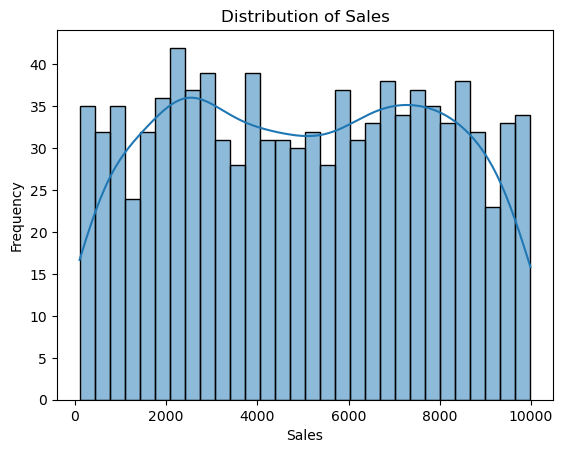

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Sales_Amount'], bins=30, kde=True) #the kde is used for a line on the histogram
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

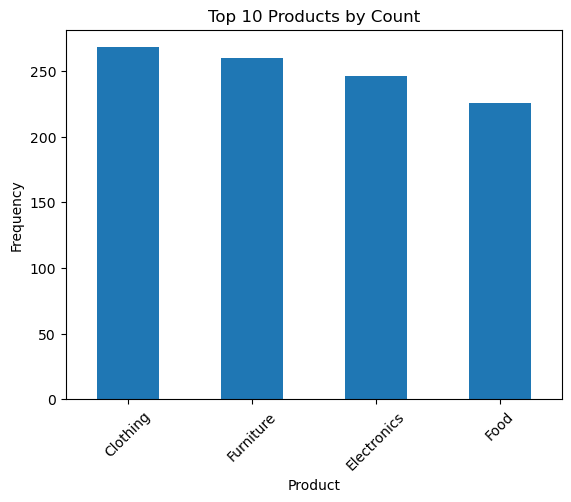

In [7]:
# Bar plot of most common products (Top 10)
df['Product_Category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Products by Count')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

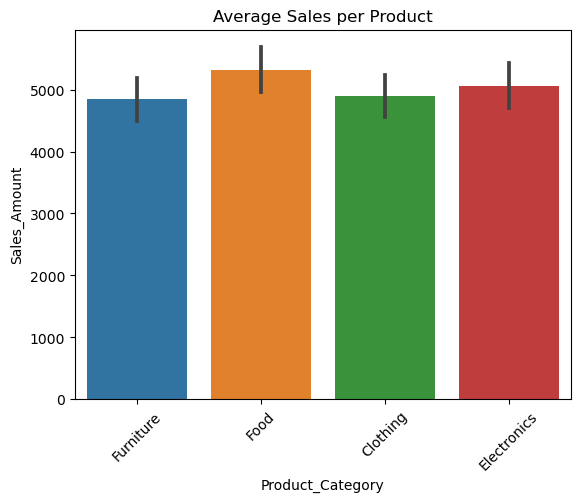

In [17]:

sns.barplot(data=df, x='Product_Category', y='Sales_Amount')
plt.xticks(rotation=45)
plt.title('Average Sales per Product')
plt.show()

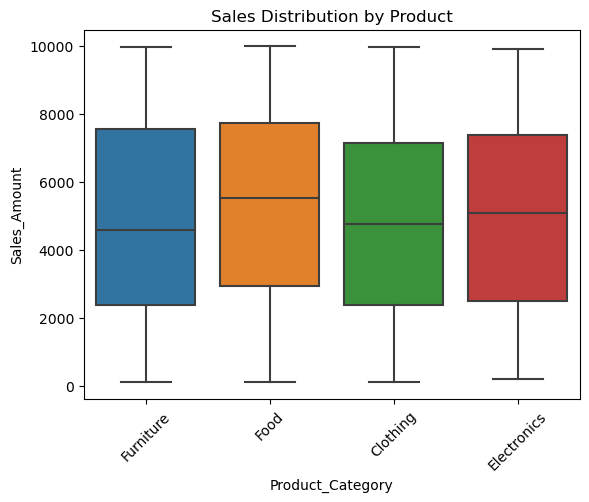

In [18]:

sns.boxplot(data=df, x='Product_Category', y='Sales_Amount')
plt.xticks(rotation=45)
plt.title('Sales Distribution by Product')
plt.show()


Trend over Time

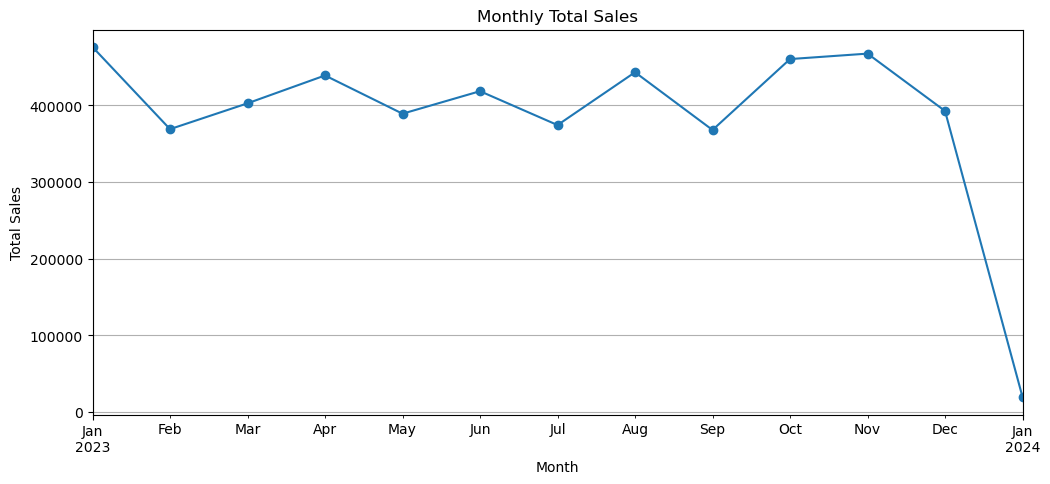

In [20]:
# Convert to datetime if not already
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

# Group by month and sum sales
monthly_sales = df.resample('M', on='Sale_Date')['Sales_Amount'].sum()

monthly_sales.plot(figsize=(12, 5), marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [21]:
pip install ydata-profiling

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.11.7 which is incompatible.



  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/79/70/1430ad64b36c3d11abd222a95c1568ee56f5a23b07224c699f2b64825bb9/ydata_profiling-4.16.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/6a/c0/ec2b1c8712ca690e5d61979dee872603e92b8a32f94cc1b72d53beab008a/pydantic-2.11.7-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/68.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/68.0 kB ? eta -:--:--
     ----------------- -------------------- 30.7/68.0 kB 163.8 kB/s eta 0:00:01
     ----------------- -------------------- 30.7/68.0 kB 163

In [22]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Sales Data Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 90.75it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]